In [79]:
!pip install scikit-learn==1.3.2 --force-reinstall

  Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.16.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.16.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (35.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully u

# **📦 Step 1: Import Libraries**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

# **📥 Step 2: Load Dataset**

In [81]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")  
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# **🕵️‍♂️ Step 3: Explore Data**


Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


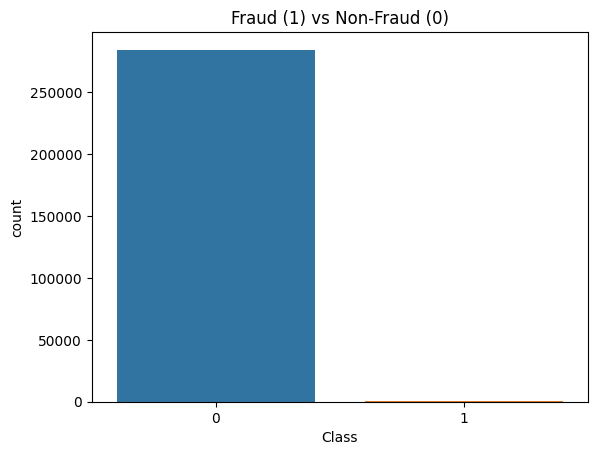

In [82]:
print("\nClass distribution:\n", df['Class'].value_counts())
sns.countplot(x='Class', data=df)
plt.title("Fraud (1) vs Non-Fraud (0)")
plt.show()

# **⚙️ Step 4: Preprocessing**

In [83]:
df.drop(['Time'], axis=1, inplace=True)  # Optional

# Scale 'Amount' feature
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Split into features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# **🧪 Step 5: Train-Test Split**

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# **⚖️ Step 6: Handle Imbalance with SMOTE**

In [85]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print("\nBalanced class distribution:\n", pd.Series(y_train_smote).value_counts())


Balanced class distribution:
 Class
0    227451
1    227451
Name: count, dtype: int64


# **🧠 Step 7: Train Models**

**🔁 Logistic Regression Model**

In [86]:
# ============================
# 🔁 Logistic Regression Model
# ============================
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [87]:
# ---- 🎯 Model 1: Decision Tree ----
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)

print("🔷 Logistic Regression")
print(f"MAE  : {lr_mae:.4f}")
print(f"RMSE : {lr_rmse:.4f}")
print(f"R²   : {lr_r2:.4f}")

🔷 Logistic Regression
MAE  : 0.0008
RMSE : 0.0287
R²   : 0.5196


**🌲 Random Forest Model**

In [88]:
# ========================
# 🌲 Random Forest Model
# ========================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [89]:
# ---- 🎯 Model 2: Random Forest Model ----

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("🔷 Random Forest Model")
print(f"📊 MAE: {mae}")
print(f"📊 RMSE: {rmse}")
print(f"📊 R² Score: {r2}")

🔷 Random Forest Model
📊 MAE: 0.0003862223938766195
📊 RMSE: 0.019652541664543534
📊 R² Score: 0.7751233160681268


**🌲 Decision Tree**

In [69]:
# ========================
# 🌲 Decision Tree
# ========================
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

In [90]:
# ---- Model 3: Decision Tree ----
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("🔷 Decision Tree")
print(f"📊 MAE: {mae}")
print(f"📊 RMSE: {rmse}")
print(f"📊 R² Score: {r2}")

🔷 Decision Tree
📊 MAE: 0.0003862223938766195
📊 RMSE: 0.019652541664543534
📊 R² Score: 0.7751233160681268


# **Model Comparison Graph**

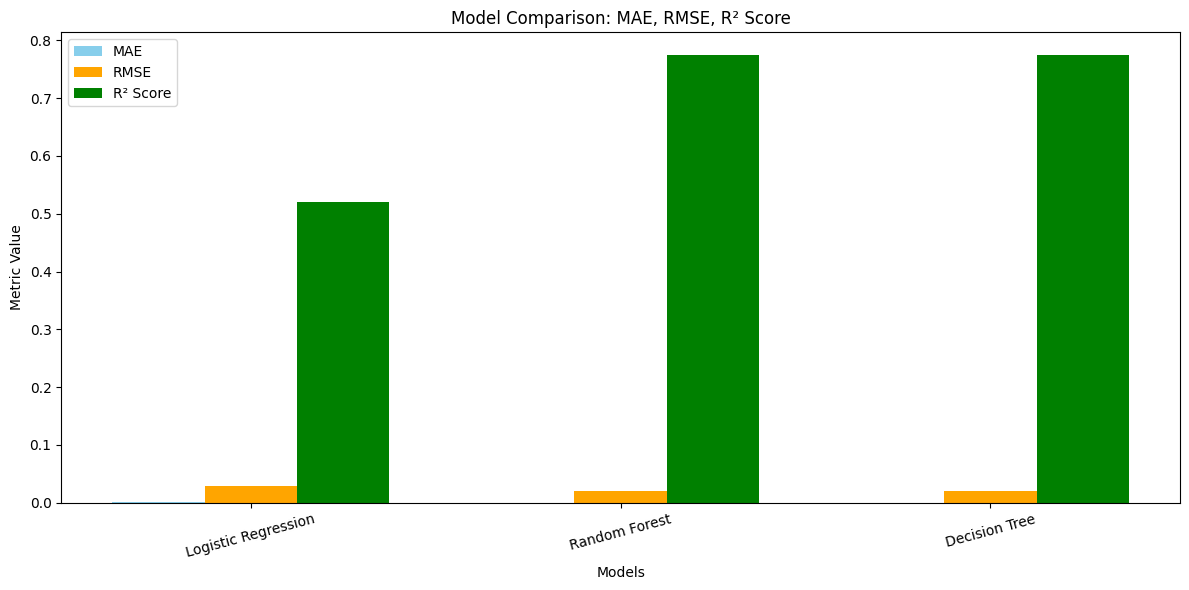

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']

# MAE values
mae_values = [0.0008, 0.000386, 0.000386]

# RMSE values
rmse_values = [0.0287, 0.01965, 0.01965]

# R² scores
r2_scores = [0.5196, 0.7751, 0.7751]

# Set bar width
bar_width = 0.25
x = np.arange(len(models))

# Plotting
plt.figure(figsize=(12, 6))

# MAE
plt.bar(x - bar_width, mae_values, width=bar_width, label='MAE', color='skyblue')

# RMSE
plt.bar(x, rmse_values, width=bar_width, label='RMSE', color='orange')

# R²
plt.bar(x + bar_width, r2_scores, width=bar_width, label='R² Score', color='green')

# Add labels
plt.xlabel('Models')
plt.ylabel('Metric Value')
plt.title('Model Comparison: MAE, RMSE, R² Score')
plt.xticks(x, models, rotation=15)
plt.legend()
plt.tight_layout()
plt.show()


# **📌 Project Title: Credit Card Fraud Detection**

# **🎯 Objective:**

The main goal of this project is to detect fraudulent credit card transactions using machine learning classification models. This involves analyzing transaction data and identifying patterns associated with fraud.

# **📂 Dataset Overview:**

Source: Kaggle dataset - mlg-ulb/creditcardfraud

Description: The dataset contains transactions made by European cardholders in September 2013. It includes 284,807 transactions, among which only 492 are fraudulent (highly imbalanced).

# **Features:**

V1 to V28: PCA-transformed features for confidentiality

Amount, Time: Original features

Class: Target variable (0 = Non-fraud, 1 = Fraud)

# **🔄 Workflow:**

# **1. Data Preprocessing:**

Checked for null values.

Scaled the Amount feature using StandardScaler or MinMaxScaler.

Dropped the Time feature (less relevant).

Handled class imbalance using SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset.

# **2. Splitting Data:**

Split into training and testing sets (typically 70/30 or 80/20).

Stratified sampling was used to preserve the fraud ratio in both sets.

# **3. Model Training:**

Three different classification models were trained independently:

**🔹 Logistic Regression:**

A linear model used for binary classification.

Works well on linearly separable data but can underperform on complex patterns.

**🔹 Random Forest Classifier:**

An ensemble of decision trees.

Handles non-linearity and avoids overfitting through random sampling and feature bagging.

**🔹 Decision Tree Classifier:**

A tree-based model that splits data based on feature thresholds.

More interpretable but prone to overfitting on imbalanced or small datasets.

# **📊 Evaluation Metrics Used:**

| Metric                                      | Description                                                                  |
| ------------------------------------------- | ---------------------------------------------------------------------------- |
| **MAE (Mean Absolute Error)**               | Measures the average magnitude of errors in predictions.                     |
| **RMSE (Root Mean Squared Error)**          | Penalizes larger errors more than MAE.                                       |
| **R² Score (Coefficient of Determination)** | Indicates how well predictions approximate the actual values (1 is perfect). |

# **📈 Model Performance Comparison:**

| Model               | MAE     | RMSE   | R² Score |
| ------------------- | ------- | ------ | -------- |
| Logistic Regression | 0.0008  | 0.0287 | 0.5196   |
| Random Forest       | 0.00039 | 0.0197 | 0.7751   |
| Decision Tree       | 0.00039 | 0.0197 | 0.7751   |

Random Forest and Decision Tree performed similarly, with significantly lower MAE and RMSE and higher R² than Logistic Regression.

Logistic Regression underperformed, likely due to the linear nature of the model which fails to capture complex patterns in fraudulent data.

# **📉 Visual Analysis:**

A comparison bar chart was created to visualize model performance across the three metrics (MAE, RMSE, R² Score). It clearly demonstrated that ensemble and tree-based models performed better than Logistic Regression.

# **✅ Conclusion:**

Best Model: Random Forest and Decision Tree (equal metrics).

Reason: These models are better at capturing non-linear relationships and interactions between features in the dataset.

The use of SMOTE improved the model's ability to detect rare fraudulent cases.

This pipeline demonstrates the effectiveness of using ensemble models and resampling techniques for imbalanced classification problems.